<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 106.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
#Remove duplicates from critical columns
## Utilize strategic identification of duplicates
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']

# Save original size
original_size = df.shape[0]

# Drop duplicates based on selected columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Report the difference
print(f"Original dataset size: {original_size}")
print(f"After removing duplicates based on {subset_cols}: {df_cleaned.shape[0]} rows")
print(f"Rows removed: {original_size - df_cleaned.shape[0]}")

Original dataset size: 65437
After removing duplicates based on ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']: 37332 rows
Rows removed: 28105


In [4]:
df = df_cleaned.copy()

In [5]:
# Column data types and non-null counts
print(df.info())

# Count of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 37332 entries, 0 to 65435
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 32.8+ MB
None

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork              4990
                       ...  
JobSatPoints_11        20433
SurveyLength            4217
SurveyEase              4191
ConvertedCompYearly    23227
JobSat                 20660
Length: 114, dtype: int64


In [6]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

# Optional: fill in missing values
df['Country'] = df['Country'].fillna('Unknown')

In [7]:
# Step 1: Apply your country mapping first (from earlier step)
df['Country'] = df['Country'].replace(country_mapping)
df['Country'] = df['Country'].fillna('Unknown')

# Step 2: Count frequencies
country_counts = df['Country'].value_counts()

# Step 3: Identify countries that appear fewer than 5 times
low_freq_countries = country_counts[country_counts < 5].index

# Step 4: Replace them with 'Other'
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in low_freq_countries else x)

print(df['Country'].value_counts(dropna=False))

Country
USA                    4081
Unknown                2759
Germany                2325
India                  1551
UK and N. Ireland      1530
                       ... 
Mauritania                5
Botswana                  5
Suriname                  5
Cape Verde                5
Antigua and Barbuda       5
Name: count, Length: 150, dtype: int64


In [8]:
import numpy as np

# Create mapping for education levels
edlevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelors",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Masters",
    "Some college/university study without earning a degree": "Some college",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "High school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Primary/elementary school": "Primary school",
    "Something else": "Other",
    "EdLevel": "Unknown",  # cleanup from string label
    np.nan: "Unknown"      # fill missing values
}

# Apply mapping
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Optional: Group all levels with < 2000 responses into 'Other'
ed_counts = df['EdLevel'].value_counts()
low_ed_levels = ed_counts[ed_counts < 2000].index

df['EdLevel'] = df['EdLevel'].apply(lambda x: 'Other' if x in low_ed_levels else x)

# Check unique values in 'EdLevel' column
print(df['EdLevel'].unique())
print(df['EdLevel'].value_counts(dropna=False))

['Other' 'Bachelors' 'Masters' 'Some college' 'High school' 'Professional']
EdLevel
Bachelors       12300
Masters          8611
Some college     5579
Other            4708
High school      3725
Professional     2409
Name: count, dtype: int64


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [9]:
## Write your code here
# Count missing values in each column and sort in descending order
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
print(missing_values)

AINextMuch less integrated    36540
AINextLess integrated         35844
AINextNo change               29976
AINextMuch more integrated    28968
EmbeddedAdmired               27279
                              ...  
DevType                        2490
NEWSOSites                     2232
YearsCode                      2197
AISelect                       1980
LearnCode                      1809
Length: 107, dtype: int64


In [10]:
# Check how many unique non-null values it has
print(df['Check'].dropna().unique())

['Apples']


In [11]:
df.drop('Check', axis=1, inplace=True)


In [12]:
# Fill missing values in EdLevel with the mode
most_frequent_edlevel = df['EdLevel'].mode()[0]
df['EdLevel'].fillna(most_frequent_edlevel, inplace=True)

# Optional: verify imputation worked
print("Missing values in 'EdLevel' after imputation:", df['EdLevel'].isnull().sum())

Missing values in 'EdLevel' after imputation: 0


/tmp/ipykernel_301/459579380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent_edlevel, inplace=True)


In [13]:
# Specify the columns of interest
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Count missing values in those columns
missing_critical = df[critical_columns].isnull().sum()

# Display the result
print(missing_critical)


Employment        0
JobSat        20660
RemoteWork     4990
dtype: int64


In [14]:
# Impute missing values in RemoteWork
df['RemoteWork'] = df['RemoteWork'].fillna("Hybrid (some remote, some in-person)")
print("Missing values in RemoteWork:", df['RemoteWork'].isnull().sum())

Missing values in RemoteWork: 0


In [15]:
# Calculate the percentage of missing 'JobSat' values
missing_jobsat = df['JobSat'].isnull().sum()
total_rows = len(df)
percent_missing_jobsat = (missing_jobsat / total_rows) * 100

# Display the result
print(f"Missing 'JobSat' values represent {percent_missing_jobsat:.2f}% of the dataset.")


Missing 'JobSat' values represent 55.34% of the dataset.


In [16]:
# Count the number of unique non-null values in 'JobSat'
unique_jobsat = df['JobSat'].nunique(dropna=True)

# Display the result
print(f"Number of unique values in 'JobSat': {unique_jobsat}")
print('')
print(df['JobSat'].dropna().unique())
print('')
print(df['JobSat'].value_counts(dropna=True))


Number of unique values in 'JobSat': 11

[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]

JobSat
8.0     4218
7.0     3517
6.0     2154
9.0     2024
10.0    1450
5.0     1170
4.0      672
3.0      650
2.0      441
0.0      192
1.0      184
Name: count, dtype: int64


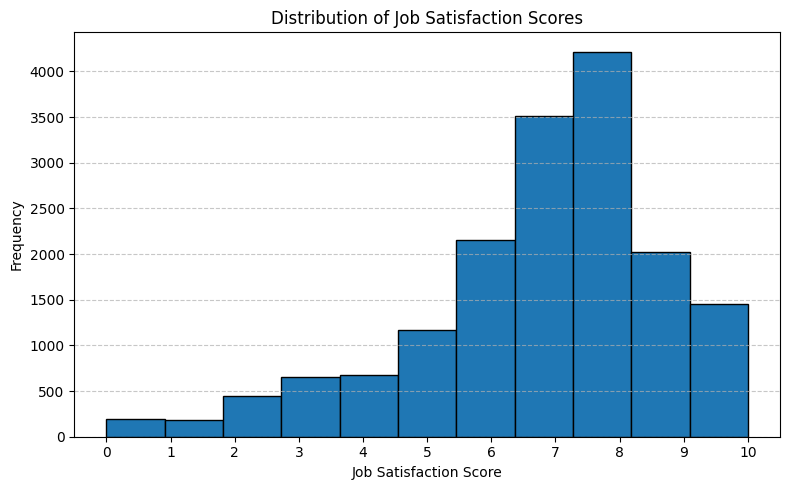

In [17]:
import matplotlib.pyplot as plt

# Drop missing values for the histogram
jobsat_values = df['JobSat'].dropna()

# Create the histogram
plt.figure(figsize=(8, 5))
plt.hist(jobsat_values, bins=11, edgecolor='black')
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(range(11))  # Assuming scores are from 0 to 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [18]:
## Write your code here
# Convert to numeric, coercing errors (if YearsCodePro is object)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience bins
bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5', '5–10', '10–20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)


In [19]:
median_jobsat_by_range = df.groupby('ExperienceRange')['JobSat'].median()
print(median_jobsat_by_range)


ExperienceRange
0–5      7.0
5–10     7.0
10–20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_301/870159116.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_range = df.groupby('ExperienceRange')['JobSat'].median()


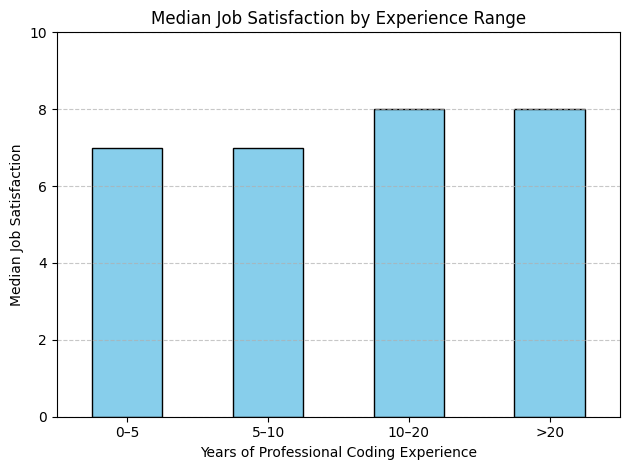

In [20]:
import matplotlib.pyplot as plt

# Plotting
median_jobsat_by_range.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.ylim(0, 10)  # optional, if JobSat is 0–10 scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


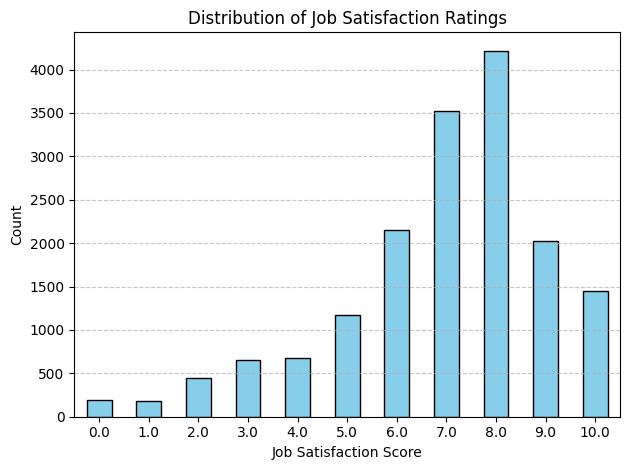

In [21]:
df['JobSat'].value_counts(dropna=True).sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Job Satisfaction Ratings')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_301/1181386190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='Blues', order=sorted(df['JobSat'].dropna().unique()))


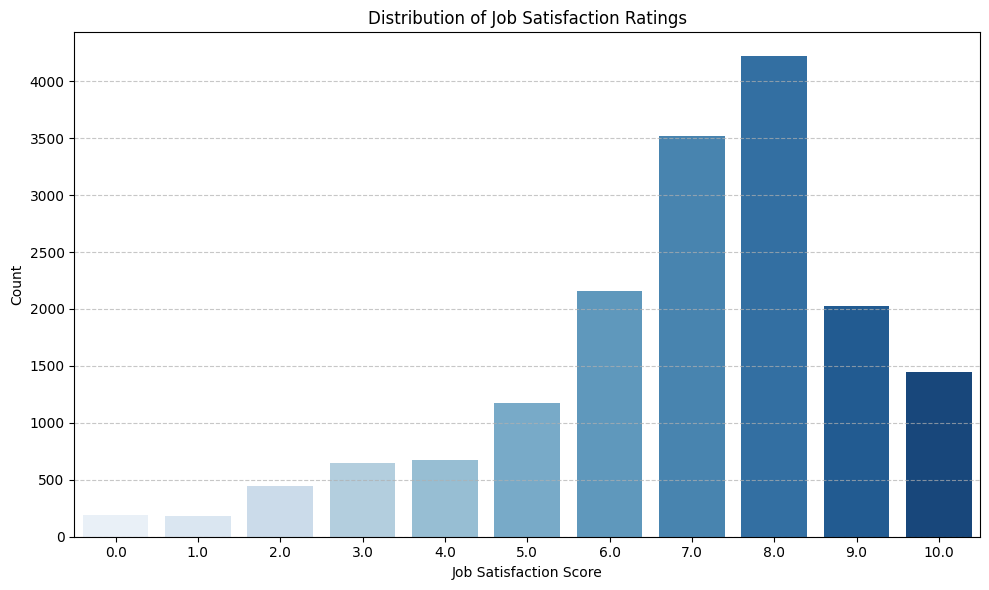

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for JobSat (excluding missing values)
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='Blues', order=sorted(df['JobSat'].dropna().unique()))
plt.title('Distribution of Job Satisfaction Ratings')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: xlabel='ExperienceRange', ylabel='JobSat'>

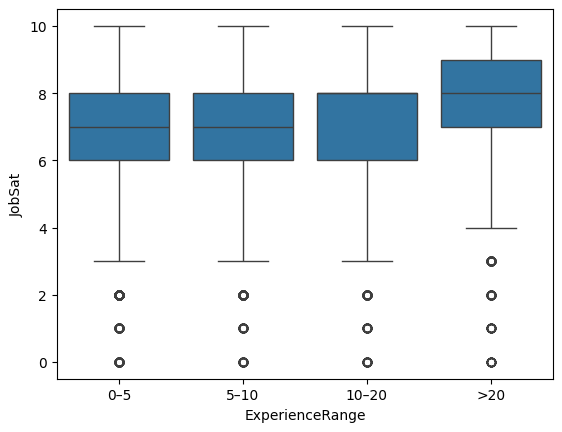

In [23]:
sns.boxplot(x='ExperienceRange', y='JobSat', data=df)


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


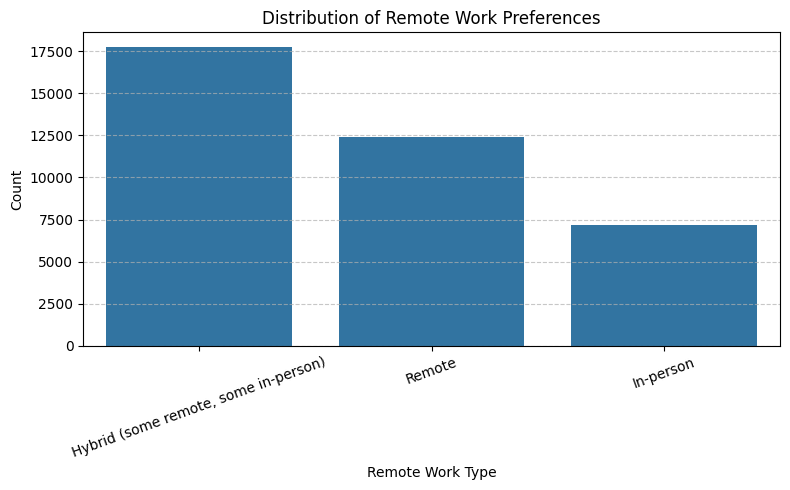

In [24]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Type')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
# Cross-tabulation
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print(remote_by_employment.round(1))


RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 41.5   
Employed, full-time;Employed, part-time                                             40.4   
Employed, full-time;Independent contractor, fre...                                  38.6   
Employed, full-time;Independent contractor, fre...                                  43.2   
Employed, full-time;Independent contractor, fre...                                   0.0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                  57.1   
Student, full-time;Student, part-time;Retired                                      100.0   
Student, part-time                                                              

/tmp/ipykernel_301/3092156129.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


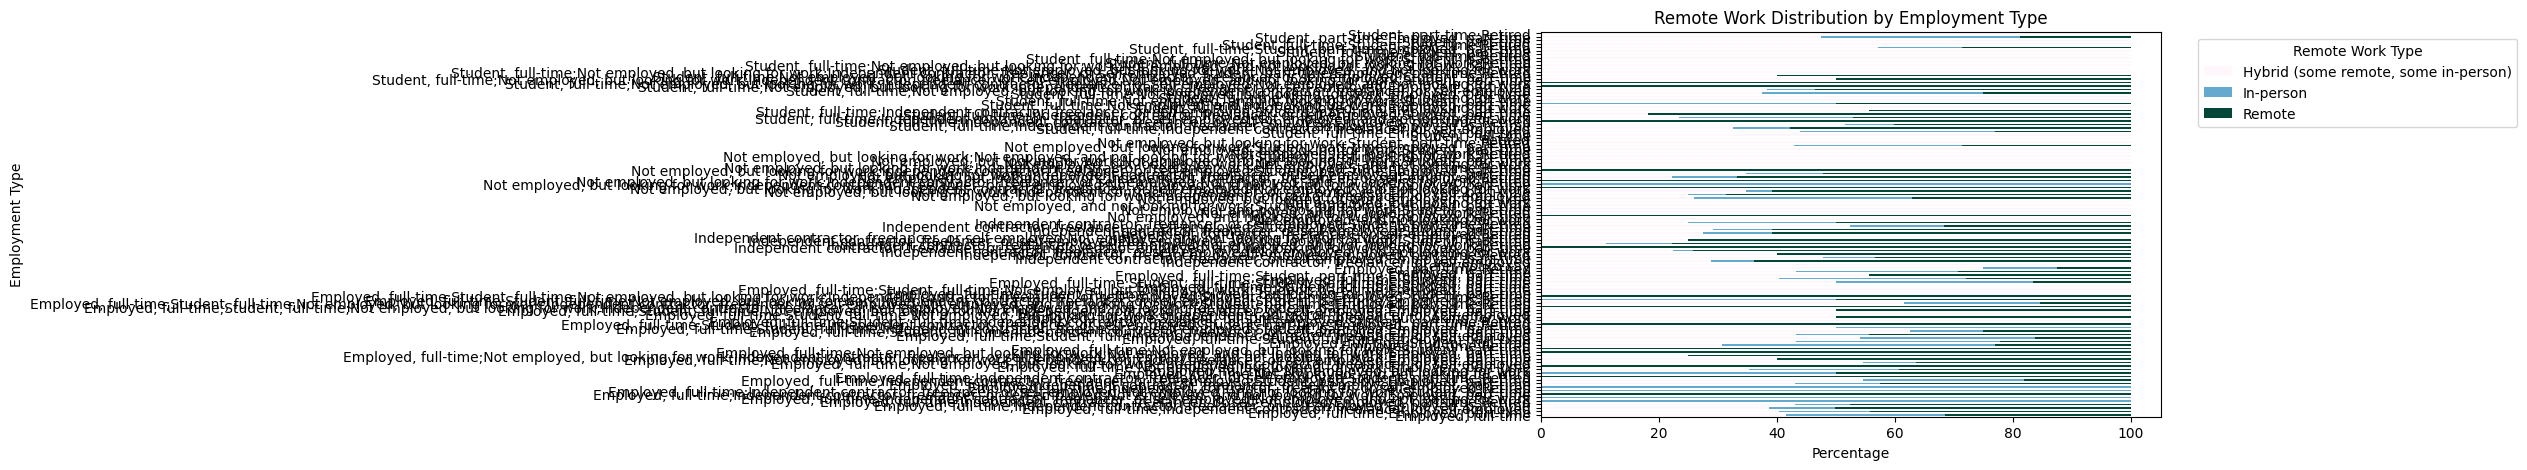

In [26]:
# Cross-tab of Employment and RemoteWork as percentages
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100

# Plot
remote_by_employment.plot(kind='barh', stacked=True, figsize=(8, 5), colormap='PuBuGn')
plt.title('Remote Work Distribution by Employment Type')
plt.xlabel('Percentage')
plt.ylabel('Employment Type')
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
# Extract the first listed employment type
df['EmploymentClean'] = df['Employment'].str.split(';').str[0].str.strip()


In [28]:
remote_by_clean_emp = pd.crosstab(df['EmploymentClean'], df['RemoteWork'], normalize='index') * 100
print(remote_by_clean_emp.round(1))


RemoteWork                                          Hybrid (some remote, some in-person)  \
EmploymentClean                                                                            
Employed, full-time                                                                 41.2   
Employed, part-time                                                                 43.4   
I prefer not to say                                                                100.0   
Independent contractor, freelancer, or self-emp...                                  30.5   
Not employed, and not looking for work                                              99.4   
Not employed, but looking for work                                                  79.7   
Retired                                                                            100.0   
Student, full-time                                                                  74.7   
Student, part-time                                                              

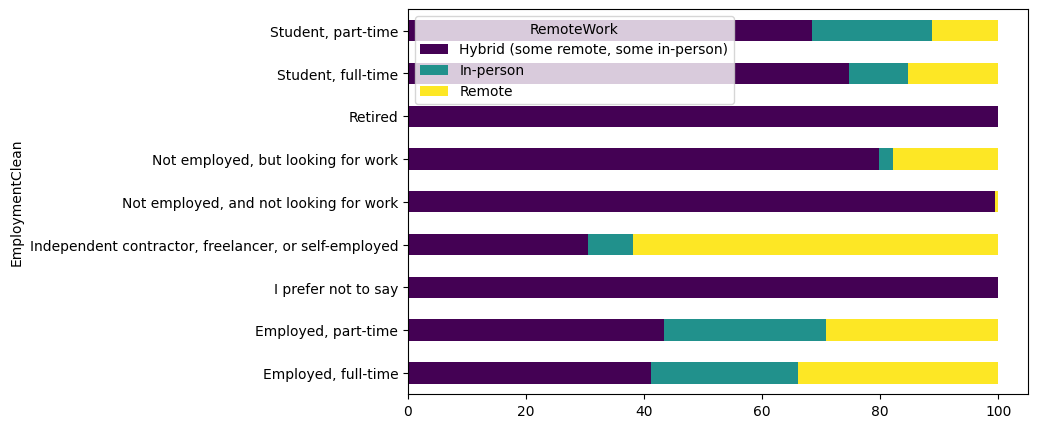

<Figure size 1000x600 with 0 Axes>

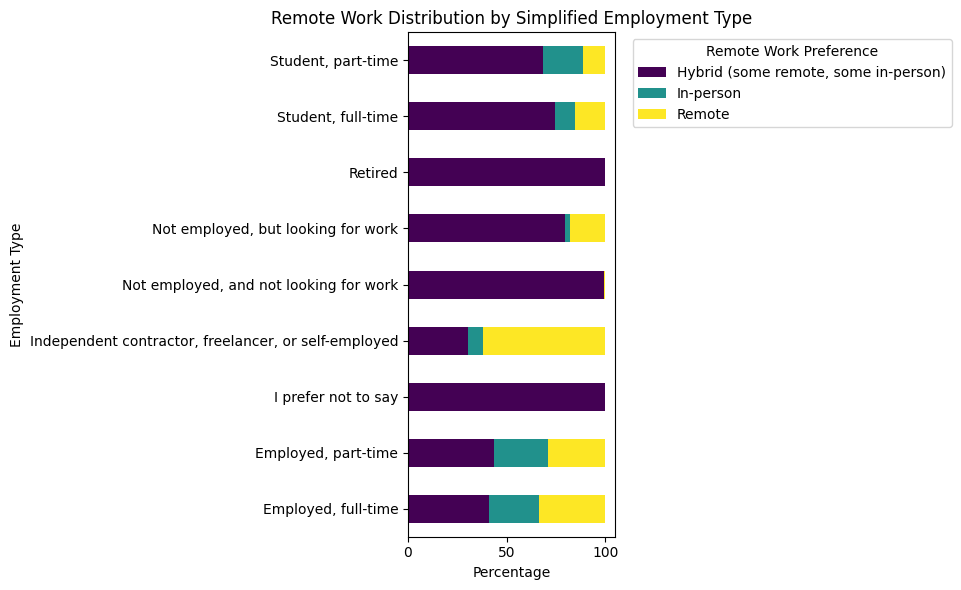

In [29]:
remote_by_clean_emp.plot(kind='barh', stacked=True, figsize=(8, 5), colormap='viridis')
plt.figure(figsize=(10, 6))  # was too short before

remote_by_clean_emp.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Remote Work Distribution by Simplified Employment Type')
plt.xlabel('Percentage')
plt.ylabel('Employment Type')

# Move legend outside the plot area
plt.legend(
    title='Remote Work Preference',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()



In [30]:
remote_by_role = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
print(remote_by_role.round(1))


RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Academic researcher                                                            60.1   
Blockchain                                                                     27.6   
Cloud infrastructure engineer                                                  47.0   
Data engineer                                                                  48.0   
Data or business analyst                                                       51.2   
Data scientist or machine learning specialist                                  55.1   
Database administrator                                                         47.9   
Designer                                                                       53.6   
DevOps specialist                                                              53.1   
Developer Advocate                         

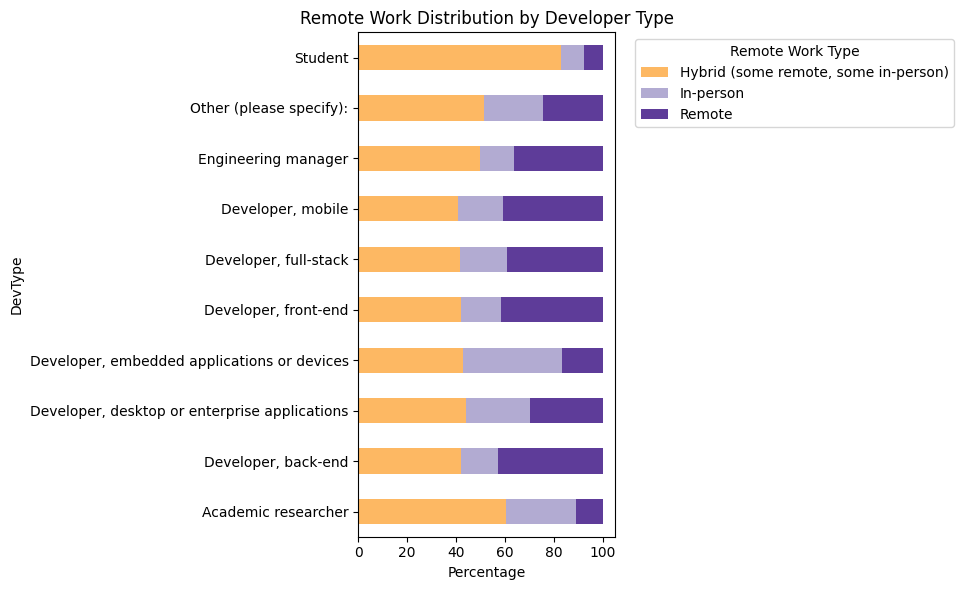

In [31]:
remote_by_role = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100

# Filter top roles by count, optional
top_roles = df['DevType'].value_counts().head(10).index
remote_subset = remote_by_role.loc[remote_by_role.index.isin(top_roles)]

# Plot
custom_colors = ['#fdb863', '#b2abd2', '#5e3c99']  # hybrid, in-person, remote

remote_subset.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=custom_colors
)

plt.title('Remote Work Distribution by Developer Type')
plt.xlabel('Percentage')
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [32]:
# Step 1: Get top 10 countries by frequency
top_countries = df['Country'].value_counts().head(10).index

# Step 2: Filter the dataset
df_top_countries = df[df['Country'].isin(top_countries)]


In [33]:
# Exclude 'Unknown' before counting
top_countries = df[df['Country'] != 'Unknown']['Country'].value_counts().head(10)
print(top_countries)



Country
USA                  4081
Germany              2325
India                1551
UK and N. Ireland    1530
Ukraine              1301
Canada               1188
France               1058
Brazil               1015
Poland                929
Italy                 887
Name: count, dtype: int64


In [34]:
top_countries = (
    df[df['Country'] != 'Unknown']['Country']
    .value_counts()
    .head(10)
    .index
)


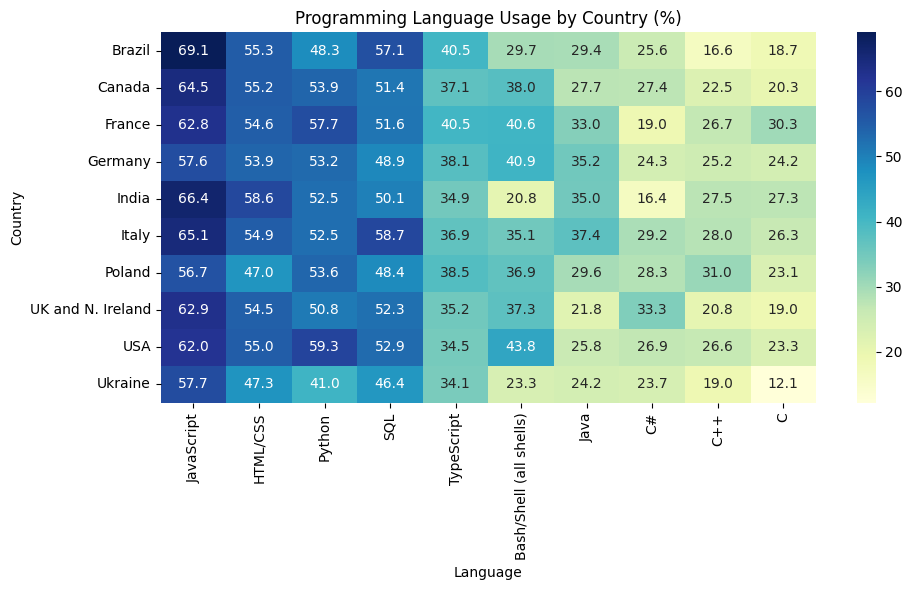

In [35]:
## Write your code here
lang_dummies = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

df_top = df[df['Country'].isin(top_countries)]
lang_by_country = pd.concat([df_top['Country'], lang_dummies], axis=1)

lang_dist = lang_by_country.groupby('Country').mean() * 100
top_langs = lang_dist.mean().sort_values(ascending=False).head(10).index
lang_dist_top = lang_dist[top_langs]

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(lang_dist_top, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Programming Language Usage by Country (%)')
plt.xlabel('Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [ ]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numeric just in case
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop missing values for both columns
df_filtered = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_filtered, alpha=0.3)
plt.title('Job Satisfaction vs. Professional Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Scatter + regression line (in separate cell)
import seaborn as sns

sns.lmplot(
    x='YearsCodePro',
    y='JobSatPoints_1',
    data=df_filtered,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Regression Line: Job Satisfaction vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df_filtered['YearsCodePro'].corr(df_filtered['JobSatPoints_1']))


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [36]:
## Write your code here
edu_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
edu_employment_ct = edu_employment_ct.round(1)
display(edu_employment_ct)


Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-t

/tmp/ipykernel_301/3389407248.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


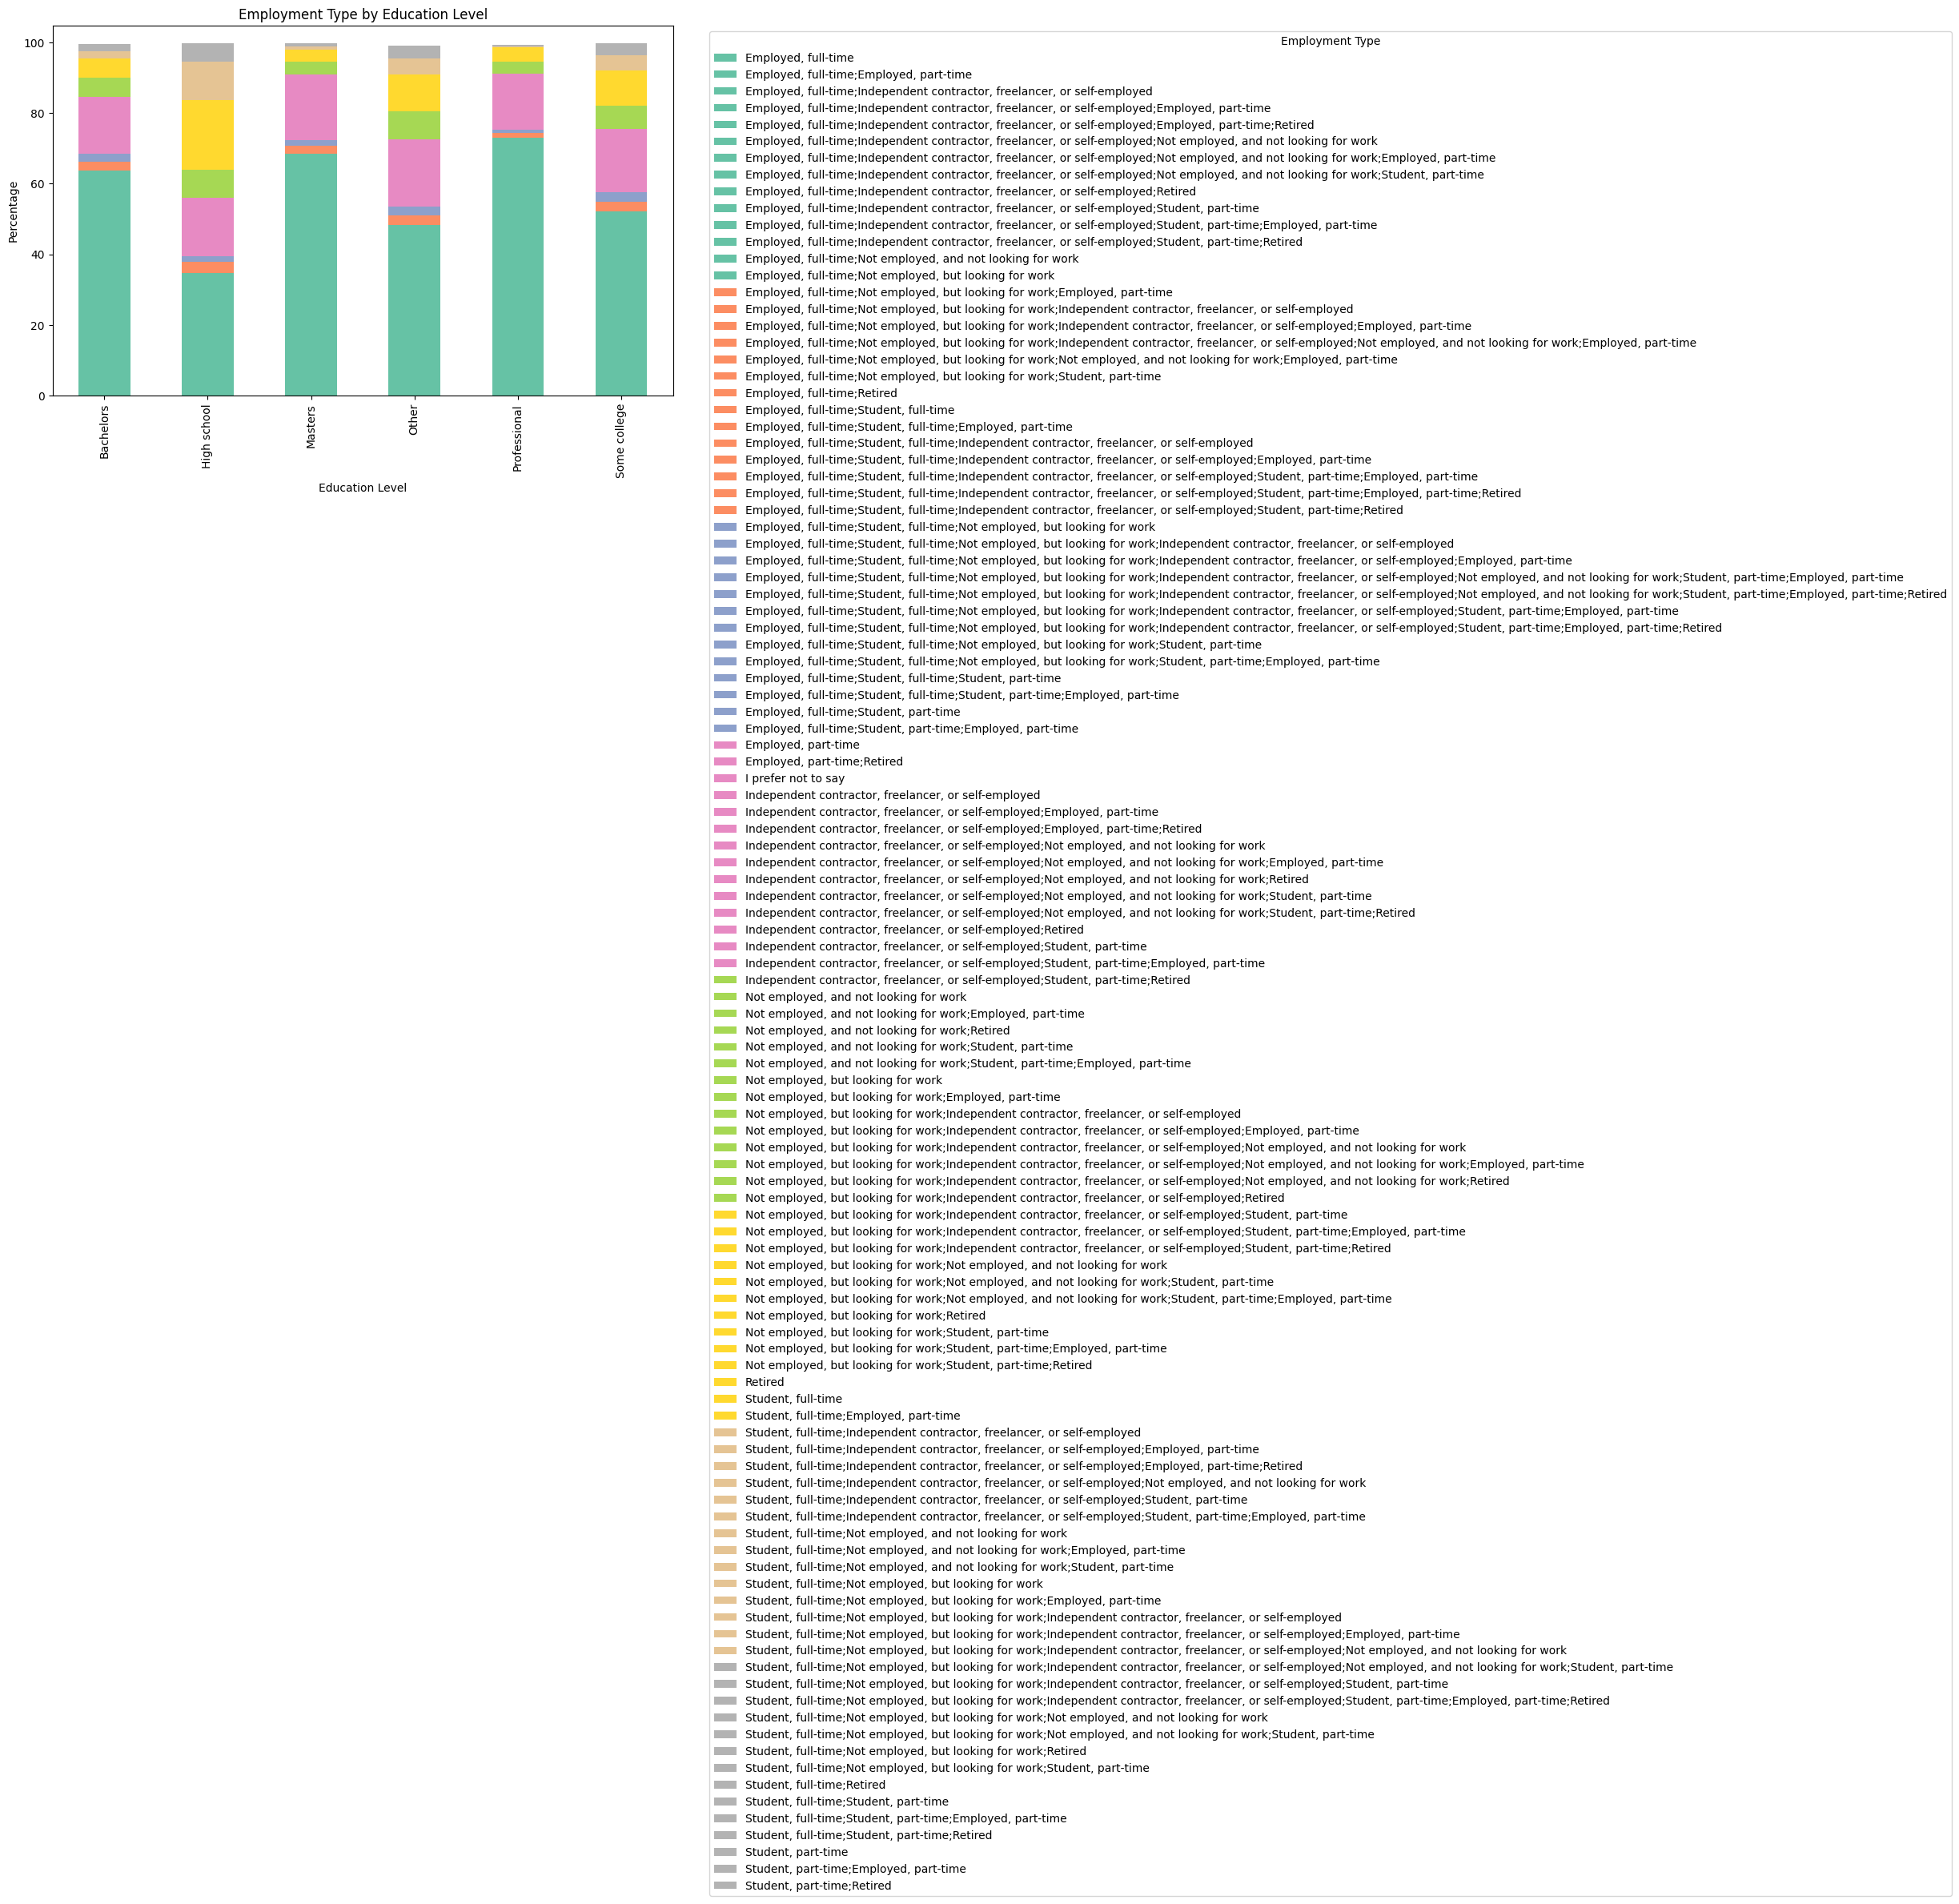

In [37]:
edu_employment_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title("Employment Type by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
def simplify_employment(emp):
    if pd.isna(emp):
        return 'Unknown'
    elif 'full-time' in emp:
        return 'Full-time'
    elif 'part-time' in emp:
        return 'Part-time'
    elif 'Independent contractor' in emp or 'freelancer' in emp or 'self-employed' in emp:
        return 'Self-employed'
    elif 'Student' in emp:
        return 'Student'
    elif 'Not employed' in emp:
        return 'Unemployed'
    elif 'Retired' in emp:
        return 'Retired'
    elif 'Prefer not to say' in emp:
        return 'Prefer not to say'
    else:
        return 'Other'

df['Employment_Simplified'] = df['Employment'].apply(simplify_employment)


In [43]:
# Define desired education level order
edu_order = ['Other','High school', 'Some college', 'Bachelors', 'Masters', 'Professional']

# Apply custom order to the EdLevel column
df['EdLevel'] = pd.Categorical(df['EdLevel'], categories=edu_order, ordered=True)


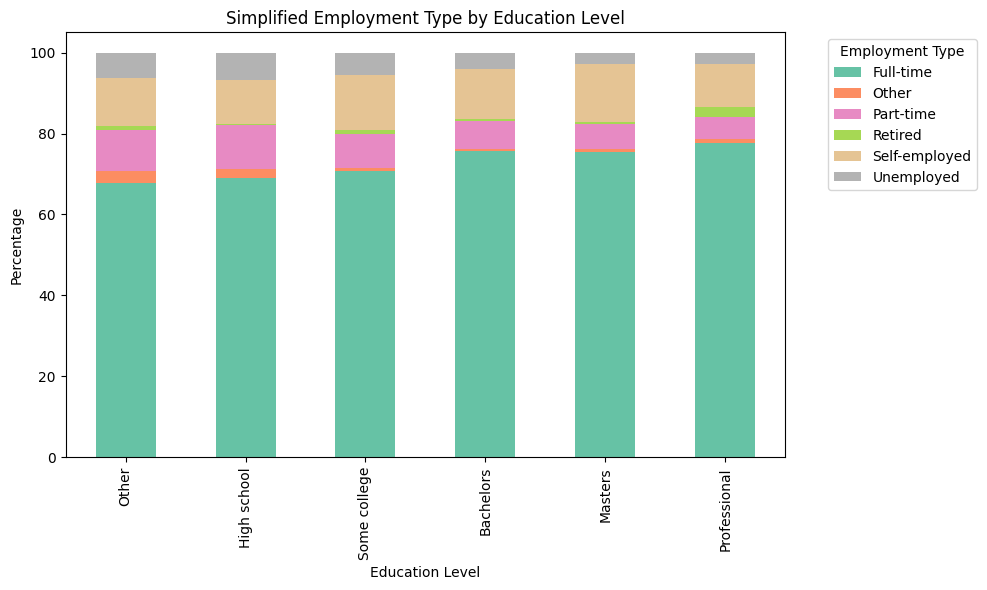

In [44]:
ct = pd.crosstab(df['EdLevel'], df['Employment_Simplified'], normalize='index') * 100
ct = ct.loc[edu_order]  # ensure the DataFrame respects the order

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Simplified Employment Type by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [46]:
def simplify_employment(emp):
    if "full-time" in emp.lower():
        return "Full-time"
    elif "part-time" in emp.lower():
        return "Part-time"
    elif "freelancer" in emp.lower() or "self-employed" in emp.lower() or "contractor" in emp.lower():
        return "Self-employed"
    elif "retired" in emp.lower():
        return "Retired"
    elif "not employed" in emp.lower() or "looking for work" in emp.lower():
        return "Unemployed"
    else:
        return "Other"

df['EmploymentSimplified'] = df['Employment'].astype(str).apply(simplify_employment)

def simplify_edlevel(ed):
    ed = str(ed).lower()
    if "bachelor" in ed:
        return "Bachelors"
    elif "master" in ed:
        return "Masters"
    elif "professional" in ed:
        return "Professional"
    elif "some college" in ed:
        return "Some college"
    elif "secondary" in ed or "high school" in ed:
        return "High school"
    else:
        return "Other"

df['EducationLevel'] = df['EdLevel'].apply(simplify_edlevel)



In [47]:
# Count and normalize to get percentages
counts = df.groupby(['EducationLevel', 'EmploymentSimplified']).size().reset_index(name='Count')
total_per_edu = counts.groupby('EducationLevel')['Count'].transform('sum')
counts['Percentage'] = (counts['Count'] / total_per_edu) * 100

df_percent = counts


/tmp/ipykernel_301/1661444913.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['EducationLevel', 'EmploymentSimplified']).size().reset_index(name='Count')
/tmp/ipykernel_301/1661444913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_edu = counts.groupby('EducationLevel')['Count'].transform('sum')


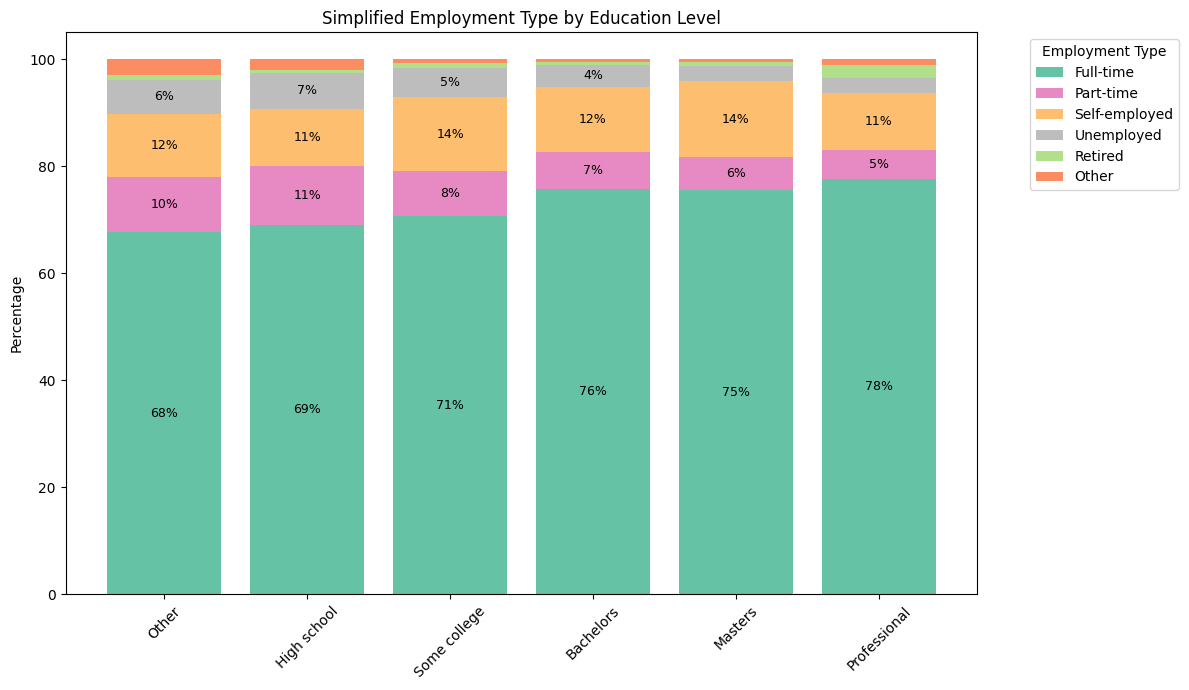

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure consistent order
edu_order = ['Other', 'High school', 'Some college', 'Bachelors', 'Masters', 'Professional']
emp_order = ['Full-time', 'Part-time', 'Self-employed', 'Unemployed', 'Retired', 'Other']
colors = {
    'Full-time': '#66c2a5',
    'Part-time': '#e78ac3',
    'Self-employed': '#fdbf6f',
    'Unemployed': '#bdbdbd',
    'Retired': '#b2df8a',
    'Other': '#fc8d62'
}

# Pivot the data
pivot_df = df_percent.pivot(index='EducationLevel', columns='EmploymentSimplified', values='Percentage').fillna(0)
pivot_df = pivot_df.loc[edu_order, emp_order]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
bottoms = pd.Series([0] * len(pivot_df), index=pivot_df.index)

for emp_type in emp_order:
    values = pivot_df[emp_type]
    bars = ax.bar(pivot_df.index, values, bottom=bottoms, label=emp_type, color=colors.get(emp_type, 'gray'))

    # Add percentage labels inside each segment if large enough
    for bar, percent in zip(bars, values):
        if percent >= 3:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{percent:.0f}%",
                ha='center', va='center', fontsize=9, color='black'
            )

    bottoms += values

# Customize plot
ax.set_ylabel("Percentage")
ax.set_title("Simplified Employment Type by Education Level")
ax.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [49]:
## Write your code here
# Save full cleaned DataFrame with simplified columns
df.to_csv("cleaned_survey_data.csv", index=False)


In [50]:
df_percent.to_csv("employment_by_education_percent.csv", index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
